<a href="https://colab.research.google.com/github/dexter11235813/EVA_5/blob/main/assignment_11/assignment_11_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

from google.colab import drive
from os.path import join

drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
%cd '/content/drive/My Drive/EVA5/EVA_5/assignment_11'


/content/drive/My Drive/EVA5/EVA_5/assignment_11


MAIN CODE

In [22]:
# !pip install pytorch-gradcam


     |████████████████████████████████| 6.0MB 2.0MB/s 
  Created wheel for pytorch-gradcam: filename=pytorch_gradcam-0.2.1-cp37-none-any.whl size=5269 sha256=f7cfa72ef28dc634cb372ac43adf3559ab0bfb832ee48dfb3cb22d19bce86f8f
  Stored in directory: /root/.cache/pip/wheels/e8/1e/35/d24150a078a90ce0ad093586814d4665e945466baa89907300
Successfully built pytorch-gradcam


In [366]:
%cd '/content/drive/My Drive/EVA5/EVA_5/assignment_11'
import importlib
import torch
import torch.nn as nn
import torch.optim as optim
import dataloader
from torchsummary import summary
import config
import model
from torch.optim.lr_scheduler import OneCycleLR
import show_images_from_batch
import cyclical_graph 
import lr_test
importlib.reload(model)
importlib.reload(config)
importlib.reload(dataloader)
importlib.reload(show_images_from_batch)
importlib.reload(lr_test)
importlib.reload(cyclical_graph)
import warnings
warnings.filterwarnings('ignore')

/content/drive/My Drive/EVA5/EVA_5/assignment_11


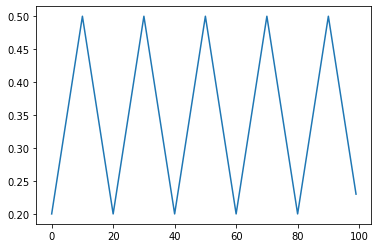

In [367]:
cyclical_graph.cyclical_plot(100, ymax=0.5, ymin=0.2, triangle_width=20)

In [355]:
train_loader, test_loader = dataloader.get_iterators()


Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

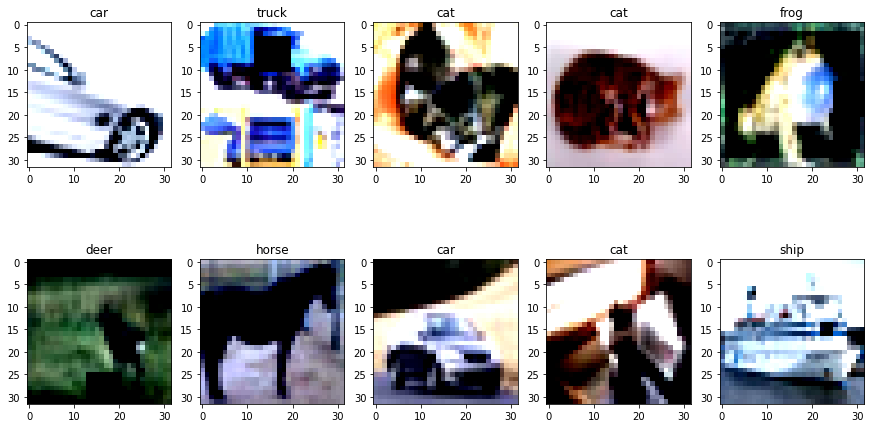

In [356]:
show_images_from_batch.get_images(train_loader)


##**LR Range Test**

In [331]:
net = model.CustomNet().to(config.DEVICE)


In [276]:
max_lr = 0.1
min_lr = 0.001

epoch = 20
criterion = nn.CrossEntropyLoss()
test_lr = lr_test.LRRangeTest(max_lr=max_lr, min_lr=min_lr, model=net, epochs=epoch, criterion=criterion, trainloader=train_loader)

In [277]:
%%time
test_lr.range_lr_test()


  0%|          | 0/98 [00:00<?, ?it/s]

step size: 0.00495
current_lr: 0.001


  0%|          | 0/98 [00:00<?, ?it/s]

train_accuracy: 24.82
current_lr: 0.00595


  0%|          | 0/98 [00:00<?, ?it/s]

train_accuracy: 35.012
current_lr: 0.0109


  0%|          | 0/98 [00:00<?, ?it/s]

train_accuracy: 33.348
current_lr: 0.01585


  0%|          | 0/98 [00:00<?, ?it/s]

train_accuracy: 33.704
current_lr: 0.0208


  0%|          | 0/98 [00:00<?, ?it/s]

train_accuracy: 31.646
current_lr: 0.02575


  0%|          | 0/98 [00:00<?, ?it/s]

train_accuracy: 29.594
current_lr: 0.030699999999999998


  0%|          | 0/98 [00:00<?, ?it/s]

train_accuracy: 27.468
current_lr: 0.03565


  0%|          | 0/98 [00:00<?, ?it/s]

train_accuracy: 29.508
current_lr: 0.040600000000000004


  0%|          | 0/98 [00:00<?, ?it/s]

train_accuracy: 26.898
current_lr: 0.04555000000000001


  0%|          | 0/98 [00:00<?, ?it/s]

train_accuracy: 25.104
current_lr: 0.05050000000000001


  0%|          | 0/98 [00:00<?, ?it/s]

train_accuracy: 24.09
current_lr: 0.05545000000000001


  0%|          | 0/98 [00:00<?, ?it/s]

train_accuracy: 21.758
current_lr: 0.060400000000000016


  0%|          | 0/98 [00:00<?, ?it/s]

train_accuracy: 21.6
current_lr: 0.06535000000000002


  0%|          | 0/98 [00:00<?, ?it/s]

train_accuracy: 24.704
current_lr: 0.07030000000000002


  0%|          | 0/98 [00:00<?, ?it/s]

train_accuracy: 20.076
current_lr: 0.07525000000000001


  0%|          | 0/98 [00:00<?, ?it/s]

train_accuracy: 21.976
current_lr: 0.08020000000000001


  0%|          | 0/98 [00:00<?, ?it/s]

train_accuracy: 20.2
current_lr: 0.08515


  0%|          | 0/98 [00:00<?, ?it/s]

train_accuracy: 22.28
current_lr: 0.0901


  0%|          | 0/98 [00:00<?, ?it/s]

train_accuracy: 21.498
current_lr: 0.09505


100%|██████████| 98/98 [00:34<00:00,  2.86it/s]

train_accuracy: 18.55
best training accuracy: 35.012
best lr: 0.00595
CPU times: user 7min 50s, sys: 3min 34s, total: 11min 24s
Wall time: 11min 24s


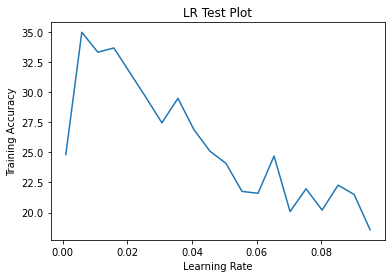

In [278]:
test_lr.plot()

In [363]:
net = model.CustomNet().to(config.DEVICE)
criterion = nn.NLLLoss().to(config.DEVICE)
optimizer = optim.SGD(net.parameters(), lr=0.01, weight_decay=0.05, momentum=0.9)
scheduler = OneCycleLR(optimizer, max_lr= 0.005, pct_start = 5/24, total_steps=config.TOTAL_STEPS, div_factor=10)


In [364]:
model_run_OCL = model.Trial(
    name="first_run_OCL",
    model=net,
    args={
        "epochs": config.EPOCH,
        "train_loader": train_loader,
        "test_loader": test_loader,
        "optimizer": optimizer,
        "loss_fn": criterion,
        "scheduler": scheduler
    }
)

model_run_OCL.run()
print("Done!")

  0%|          | 0/98 [00:00<?, ?it/s]

1 / 24
current_lr: 0.0004999999999999996


  5%|▌         | 1/20 [00:00<00:02,  8.68it/s]

 Training loss = 0.003549886168912053, Training Accuracy : 35.212


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 1.3925843017578126, Test Accuracy : 49.51
2 / 24
current_lr: 0.001159009742330268


  5%|▌         | 1/20 [00:00<00:02,  8.53it/s]

 Training loss = 0.0024320250377058983, Training Accuracy : 55.428


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 1.1524960540771485, Test Accuracy : 59.16
3 / 24
current_lr: 0.00275


  5%|▌         | 1/20 [00:00<00:02,  8.48it/s]

 Training loss = 0.0019274438964203, Training Accuracy : 65.406


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.917437857055664, Test Accuracy : 67.76
4 / 24
current_lr: 0.004340990257669732


  5%|▌         | 1/20 [00:00<00:02,  7.99it/s]

 Training loss = 0.001570757245644927, Training Accuracy : 72.102


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.7791926406860351, Test Accuracy : 72.91
5 / 24
current_lr: 0.005


  5%|▌         | 1/20 [00:00<00:02,  8.45it/s]

 Training loss = 0.0013028094545006752, Training Accuracy : 77.366


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.7545151733398437, Test Accuracy : 73.46
6 / 24
current_lr: 0.004965903599474221


  5%|▌         | 1/20 [00:00<00:02,  8.53it/s]

 Training loss = 0.0011258048471063375, Training Accuracy : 80.674


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.642323014831543, Test Accuracy : 77.85
7 / 24
current_lr: 0.004864544458820544


  5%|▌         | 1/20 [00:00<00:02,  8.60it/s]

 Training loss = 0.0009987319353967905, Training Accuracy : 83.036


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.6352622940063477, Test Accuracy : 78.79
8 / 24
current_lr: 0.0046986873911724425


  5%|▌         | 1/20 [00:00<00:02,  8.55it/s]

 Training loss = 0.0008987308829091489, Training Accuracy : 85.166


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.611501237487793, Test Accuracy : 79.29
9 / 24
current_lr: 0.004472856544978249


  5%|▌         | 1/20 [00:00<00:02,  8.77it/s]

 Training loss = 0.0008169218199327588, Training Accuracy : 86.878


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.6316714767456054, Test Accuracy : 78.51
10 / 24
current_lr: 0.004193211997025063


  5%|▌         | 1/20 [00:00<00:02,  8.41it/s]

 Training loss = 0.0007571322494186461, Training Accuracy : 87.984


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.7687679275512695, Test Accuracy : 73.98
11 / 24
current_lr: 0.0038673817216021153


  5%|▌         | 1/20 [00:00<00:02,  8.51it/s]

 Training loss = 0.0007212096243165433, Training Accuracy : 88.856


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.5094999053955078, Test Accuracy : 83.24
12 / 24
current_lr: 0.003504253519246808


  5%|▌         | 1/20 [00:00<00:02,  8.62it/s]

 Training loss = 0.0006602677167393267, Training Accuracy : 90.068


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.6133433654785156, Test Accuracy : 78.56
13 / 24
current_lr: 0.0031137325807148197


  5%|▌         | 1/20 [00:00<00:02,  8.64it/s]

 Training loss = 0.0006187044782564044, Training Accuracy : 91.052


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.4660382827758789, Test Accuracy : 84.6
14 / 24
current_lr: 0.0027064712991971946


  5%|▌         | 1/20 [00:00<00:02,  8.51it/s]

 Training loss = 0.0005823560059070587, Training Accuracy : 91.842


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.43873256912231445, Test Accuracy : 86.36
15 / 24
current_lr: 0.0022935787008028065


  5%|▌         | 1/20 [00:00<00:02,  8.53it/s]

 Training loss = 0.0005477802478708327, Training Accuracy : 92.642


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.47825174407958987, Test Accuracy : 84.75
16 / 24
current_lr: 0.0018863174192851808


  5%|▌         | 1/20 [00:00<00:02,  8.23it/s]

 Training loss = 0.0004897740436717868, Training Accuracy : 93.836


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.544297834777832, Test Accuracy : 82.13
17 / 24
current_lr: 0.0014957964807531933


  5%|▌         | 1/20 [00:00<00:02,  8.55it/s]

 Training loss = 0.0004336778074502945, Training Accuracy : 95.134


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.4411041793823242, Test Accuracy : 86.13
18 / 24
current_lr: 0.0011326682783978864


  5%|▌         | 1/20 [00:00<00:02,  8.48it/s]

 Training loss = 0.0003797373501583934, Training Accuracy : 95.966


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.4136879318237305, Test Accuracy : 87.05
19 / 24
current_lr: 0.0008068380029749386


  5%|▌         | 1/20 [00:00<00:02,  8.29it/s]

 Training loss = 0.00031169643625617027, Training Accuracy : 97.31


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.4354416259765625, Test Accuracy : 85.9
20 / 24
current_lr: 0.0005271934550217513


  5%|▌         | 1/20 [00:00<00:02,  8.50it/s]

 Training loss = 0.00025455030845478177, Training Accuracy : 98.19


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.35404316329956054, Test Accuracy : 88.98
21 / 24
current_lr: 0.00030136260882755776


  5%|▌         | 1/20 [00:00<00:02,  8.65it/s]

 Training loss = 0.00020504090934991837, Training Accuracy : 98.974


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.31283740692138673, Test Accuracy : 90.69
22 / 24
current_lr: 0.00013550554117945594


  5%|▌         | 1/20 [00:00<00:02,  7.93it/s]

 Training loss = 0.00017494156782049686, Training Accuracy : 99.338


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.30176014862060546, Test Accuracy : 91.0
23 / 24
current_lr: 3.4146400525779265e-05


  5%|▌         | 1/20 [00:00<00:02,  8.37it/s]

 Training loss = 0.0001606127480044961, Training Accuracy : 99.558


  0%|          | 0/98 [00:00<?, ?it/s]

 Test loss = 0.29707028656005857, Test Accuracy : 91.29
24 / 24
current_lr: 5e-08


  5%|▌         | 1/20 [00:00<00:02,  8.48it/s]

 Training loss = 0.00015600657206960022, Training Accuracy : 99.55


100%|██████████| 20/20 [00:02<00:00,  8.54it/s]

 Test loss = 0.2962520248413086, Test Accuracy : 91.29
Done!
